# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [73]:
import numpy as np
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import pylab as p
from scipy.stats import norm
import pandas as pd
from scipy.stats import expon

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [5]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b - a) * x
print(randoms)
print(x)

[2.77629131 2.50581943 2.10386291 2.50813019 2.57074573 2.61257776
 2.69828075 2.00044319 2.33942815 2.3175957 ]
[7.76291311e-01 5.05819429e-01 1.03862907e-01 5.08130195e-01
 5.70745726e-01 6.12577764e-01 6.98280746e-01 4.43189067e-04
 3.39428148e-01 3.17595695e-01]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [6]:
def distribucion_uniforme_aleatoria(suelo, techo, casos):
    x = uniform.rvs(size=casos)
    a = suelo
    b = techo
    return a + (b - a) * x

In [7]:
lista_01 = distribucion_uniforme_aleatoria(10, 15, 100)

In [8]:
lista_02 = distribucion_uniforme_aleatoria(10, 60, 1000)

<AxesSubplot:ylabel='Count'>

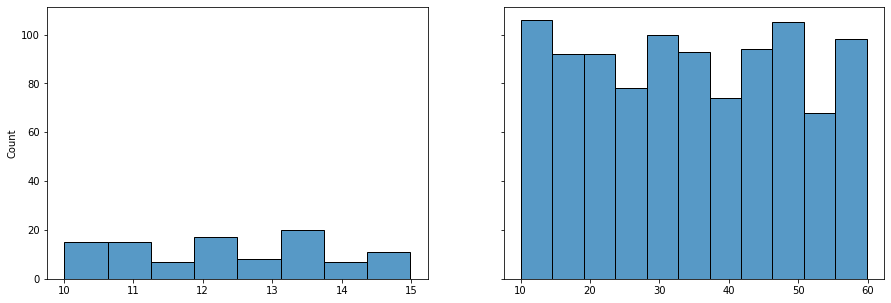

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
sn.histplot(lista_01,ax=axes[0])
sn.histplot(lista_02,ax=axes[1])

How are the two distributions different?

Pues me esparaba una distribución más uniforme, sobre todo en la distribución con 1000 casos. Son dos distribuciones similares que se diferencian en el valor de los datos y en su cantidad, dada por el número de casos.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [10]:
dist_normal_01 = norm(loc=10, scale=1)
casos_01 = dist_normal_01.rvs(size=1000)

In [11]:
dist_normal_02 = norm(loc=10, scale=50)
casos_02 = dist_normal_02.rvs(size=1000)

<AxesSubplot:ylabel='Count'>

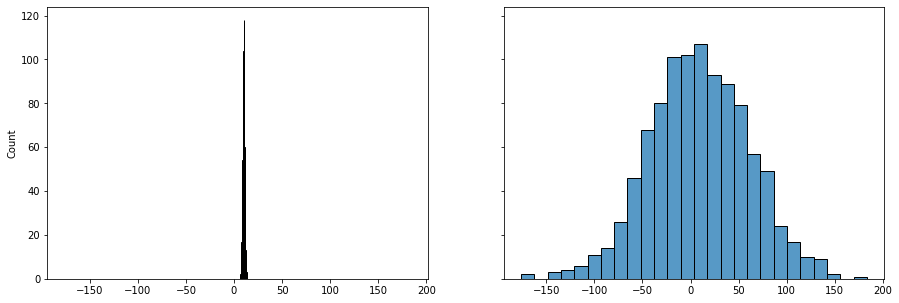

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex = True, sharey = True)
sn.histplot(casos_01,ax=axes[0])
sn.histplot(casos_02,ax=axes[1])

<AxesSubplot:ylabel='Count'>

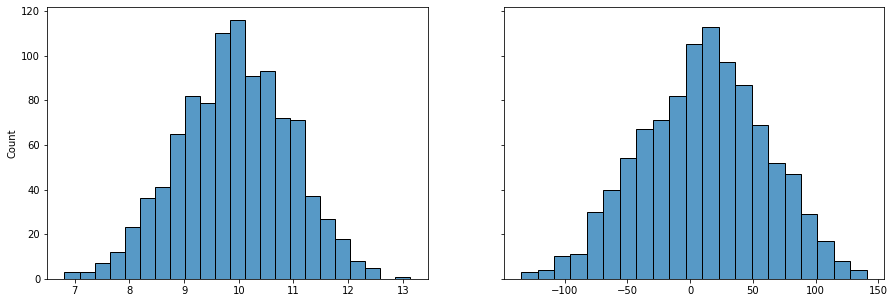

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
sn.histplot(casos_01,ax=axes[0])
sn.histplot(casos_02,ax=axes[1])

How are the two distributions different?

Los dos pares de gráficos son idénticos, pero el par de arriba comparten la escala en el eje 'x' e 'y' y el de abajo sólo en el eje 'y'. Podemos ver qué es lo que ocurre cuando aumentamos la desviación en una distribución normal y es que lo valores en x se disparan, de los valores extremos en 13 a los valores extremos en 150. Por lo demás, la distribución es muy similar.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [19]:
coches = pd.read_csv('vehicles.csv')
coches.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [49]:
barriles_anyo = coches['Fuel Barrels/Year']

<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='Count'>

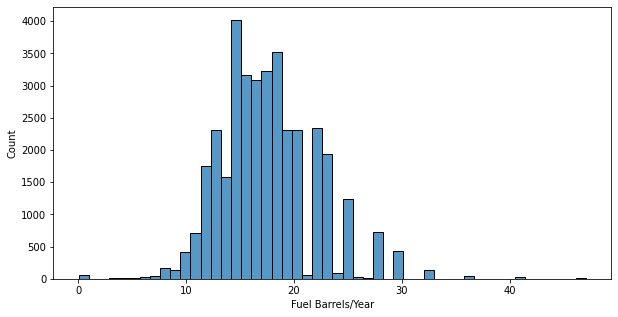

In [46]:
fig, axes = plt.subplots(figsize=(10, 5))
sn.histplot(barriles_anyo, bins = 50)

2. CO2 Emission Grams/Mile 

In [51]:
emisiones = coches['CO2 Emission Grams/Mile']

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='Count'>

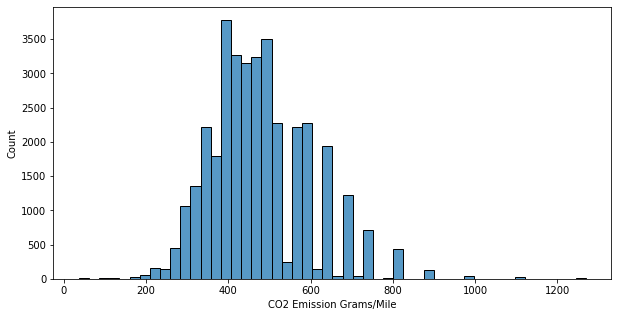

In [52]:
fig, axes = plt.subplots(figsize=(10, 5))
sn.histplot(emisiones, bins = 50)

3. Combined MPG

In [53]:
combinado = coches['Combined MPG']

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

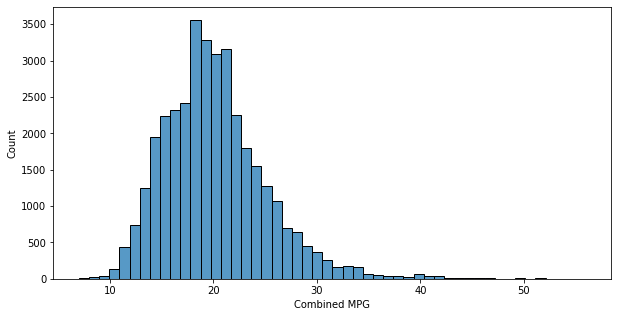

In [66]:
fig, axes = plt.subplots(figsize=(10, 5))
sn.histplot(combinado, bins = 50)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [69]:
barriles_anyo.mean() - barriles_anyo.median()

0.26116076548602507

In [68]:
emisiones.mean() - emisiones.median()

7.5794971519492265

In [70]:
combinado.mean() - combinado.median()

0.9293224299065415

La variable de barriles por año es la que más cerca está de tener una distribución normal si nos fijamos en la diferencia entre su mediana y su media. Es lo único que se me ocurre ahora mismo para poder diferenciar entre normales y asimétricas.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [82]:
def exp_dist(escala, veces):
    exp = expon(scale = escala)
    return exp.rvs(size = veces)

In [101]:
expo_01 = exp_dist(10, 10)
expo_02 = exp_dist(10, 100)

<AxesSubplot:ylabel='Count'>

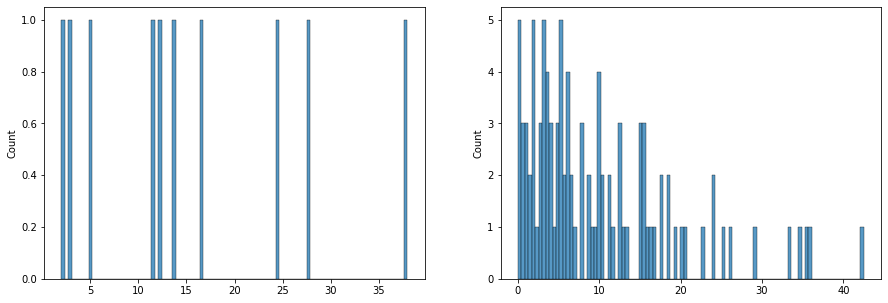

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sn.histplot(expo_01,ax=axes[0], bins = 100)
sn.histplot(expo_02,ax=axes[1], bins = 100)

How are the two distributions different?

Teóricamente  las dos distribuciones son similares, podemos observar en la primera gráfica como los valores lejanos al diez son menores y como la distancia es mayor, pero con una muestra de 10 es complicado que la experiencia se ajuste a la teoría. En la segunda tabla, se puede ver que al aumentar el número de muestras empieza a intentar dibujar lo que entenderíamos como una distribución exponencial teórica. Aunque aún le quede bastante.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [104]:
espera_banco = expon(scale=10)

In [106]:
round(espera_banco.cdf(15), 3)

0.777

La probabilidad de que una persona espere menos de 15 minutos es de 0.777

What is the probability that the customer will spend more than 15 minutes

In [110]:
round(1 - round(espera_banco.cdf(15), 3), 3)

0.223

In [112]:
espera_banco.cdf(1000) - espera_banco.cdf(15)
#Aquí tenemos una aproximación, es la probabilidad de esperar más de quince, pero menos que mil

0.2231301601484298

La probabilidad de que una persona espere más de 15 minutos es de 0.223. El contrario de esperar menos de 15